In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20870 (\N{CJK UNIFIED IDEOGRAPH-5186}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


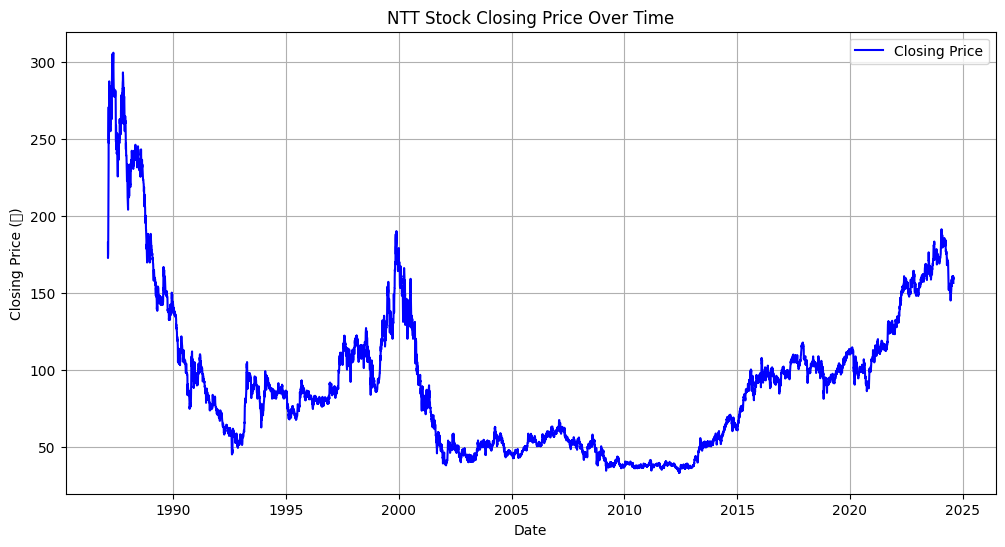

<ipython-input-3-6f4a4c722ce7>:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = stock_data.resample('M', on='Date').mean()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20870 (\N{CJK UNIFIED IDEOGRAPH-5186}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


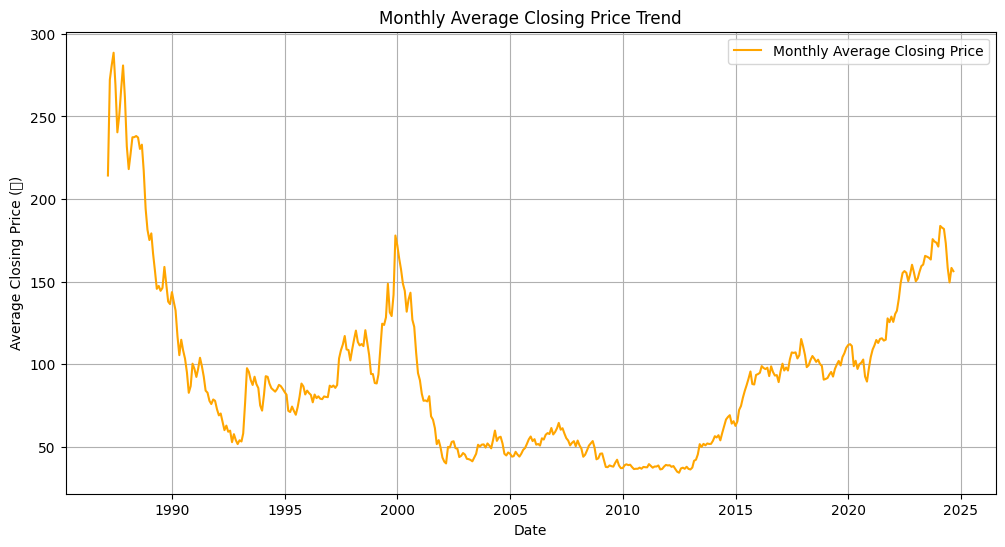

(                                Date  Closing_Price  Opening_Price  \
 count                           9202    9202.000000    9202.000000   
 mean   2005-10-21 08:44:04.642468992      92.180961      92.256183   
 min              1987-02-12 00:00:00      33.000000      33.000000   
 25%              1996-06-06 06:00:00      52.000000      52.100000   
 50%              2005-10-11 12:00:00      85.100000      85.100000   
 75%              2015-03-04 18:00:00     110.800000     110.800000   
 max              2024-08-01 00:00:00     305.900000     309.800000   
 std                              NaN      50.452228      50.598215   
 
         High_Price    Low_Price        Volume  
 count  9202.000000  9202.000000  9.202000e+03  
 mean     93.176451    91.330146  1.726677e+08  
 min      33.200000    32.200000  9.340000e+06  
 25%      52.800000    51.500000  8.073000e+07  
 50%      86.050000    84.200000  1.540150e+08  
 75%     111.900000   109.275000  2.305225e+08  
 max     311.800

In [3]:
# Load the data
file_path = 'stock_price.csv'
stock_data = pd.read_csv(file_path)

# Rename the columns to English
english_columns = {
    '日付け': 'Date',
    '出来高': 'Volume',
    '変化率 %': 'Change_Rate',
    '終値': 'Closing_Price',
    '始値': 'Opening_Price',
    '高値': 'High_Price',
    '安値': 'Low_Price',
}

stock_data.rename(columns=english_columns, inplace=True)
stock_data.drop(columns=['Change_Rate'], inplace=True)
stock_data.rename(columns={
    '終値': 'Closing_Price',
    '出来高': 'Volume',
}, inplace=True)
# Convert 'Date' column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.sort_values('Date')

# Function to convert '出来高' (Volume) from strings with 'M' (millions) and 'B' (billions) to floats
def convert_volume(volume_str):
    if 'M' in volume_str:
        return float(volume_str.replace('M', '')) * 1e6
    elif 'B' in volume_str:
        return float(volume_str.replace('B', '')) * 1e9
    else:
        return float(volume_str)

# Convert Volume column
stock_data['Volume'] = stock_data['Volume'].apply(convert_volume)

# Step 2: Statistical summary of numerical columns
basic_stats = stock_data.describe()

# Step 3: Check for missing values
missing_values = stock_data.isnull().sum()

# Step 4: Plot closing price trend over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Closing_Price'], label='Closing Price', color='blue')
plt.title('NTT Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (円)')
plt.grid(True)
plt.legend()
plt.show()

# Step 5: Check for seasonality or trends by resampling the data monthly
monthly_mean = stock_data.resample('M', on='Date').mean()

# Plot the monthly trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean.index, monthly_mean['Closing_Price'], label='Monthly Average Closing Price', color='orange')
plt.title('Monthly Average Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Average Closing Price (円)')
plt.grid(True)
plt.legend()
plt.show()

# Step 6: Detecting outliers in closing price using IQR
Q1 = stock_data['Closing_Price'].quantile(0.25)
Q3 = stock_data['Closing_Price'].quantile(0.75)
IQR = Q3 - Q1
outliers = stock_data[(stock_data['Closing_Price'] < (Q1 - 1.5 * IQR)) | (stock_data['Closing_Price'] > (Q3 + 1.5 * IQR))]

basic_stats, missing_values, outliers[['Date', 'Closing_Price']].head()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 81s 302ms/step - loss: 1.2763 - val_loss: 0.2579
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 81s 299ms/step - loss: 0.4593 - val_loss: 0.0891
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 80s 290ms/step - loss: 0.3119 - val_loss: 0.1315
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 80s 280ms/step - loss: 0.2541 - val_loss: 0.1126
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 84s 288ms/step - loss: 0.2064 - val_loss: 0.0848
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 70s 308ms/step - loss: 0.2040 - val_loss: 0.0806
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 64s 279ms/step - loss: 0.2021 - val_loss: 0.0774
Epoch 8/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 85s 295ms/step - loss: 0.1843 - val_loss: 0.0884
Epoch 9/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 64s 280ms/step - loss: 0.1635 - val_loss: 0.0920
Epoch 10/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 82s 279ms/step - loss: 0.1869 - val_loss: 0.0654


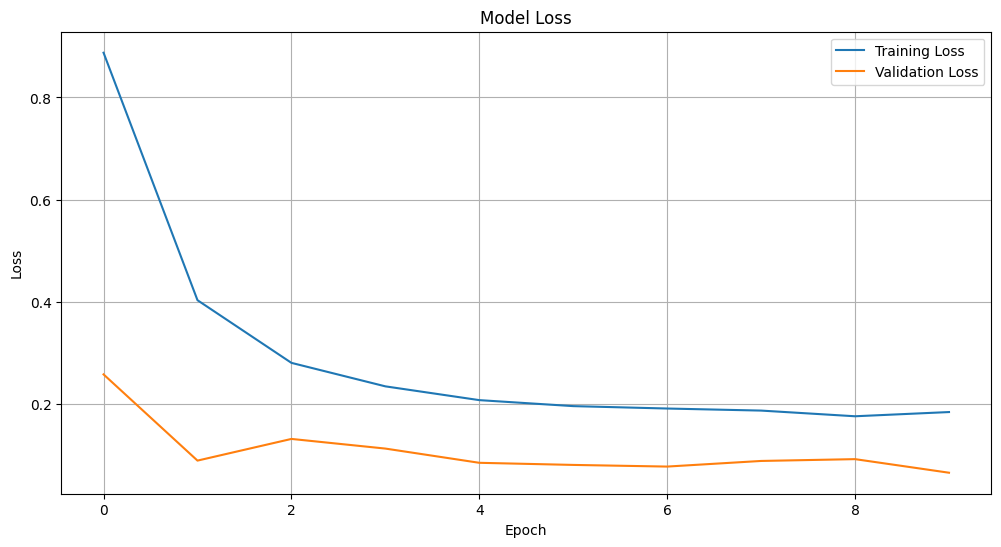

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Day 1: Closing Price: 163.26, Opening Price: 163.40, High Price: 165.47, Low Price: 161.60, Volume: 171878592
Day 2: Closing Price: 166.96, Opening Price: 167.04, High Price: 169.20, Low Price: 165.30, Volume: 171878592
Day 3: Closing Pric

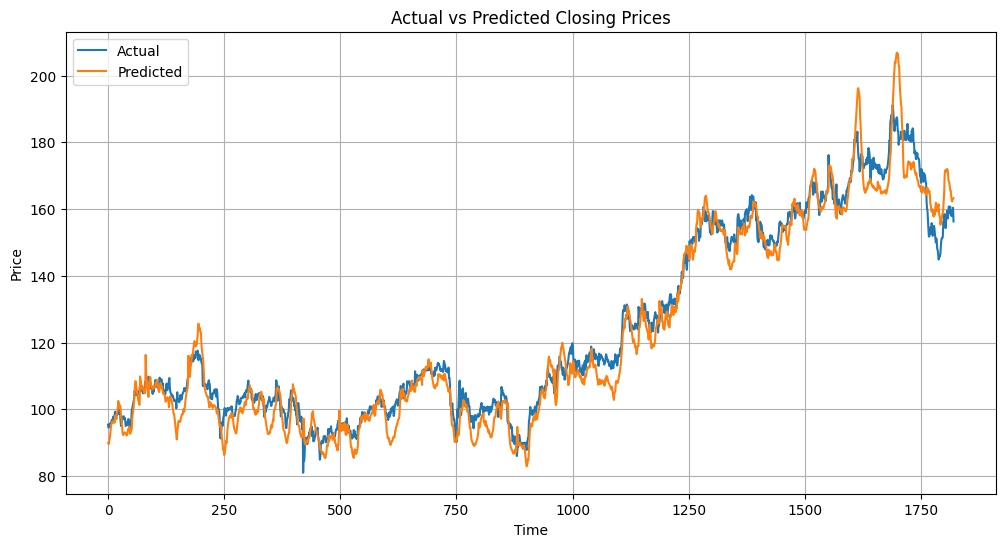

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
# Feature engineering function
def add_technical_indicators(df):
    df['SMA_20'] = df['Closing_Price'].rolling(window=20).mean()
    df['SMA_50'] = df['Closing_Price'].rolling(window=50).mean()
    df['RSI'] = calculate_rsi(df['Closing_Price'])
    return df

def calculate_rsi(prices, period=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Prepare data
def prepare_data(stock_data, window_size=500):
    features = ['Closing_Price', 'Opening_Price', 'High_Price', 'Low_Price', 'Volume',
                'SMA_20', 'SMA_50', 'RSI']

    stock_data = add_technical_indicators(stock_data)
    stock_data = stock_data.dropna()  # Drop rows with NaN values after adding indicators

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(stock_data[features])

    X, y = [], []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:(i + window_size)])
        y.append(scaled_data[i + window_size, :5])  # Predicting first 5 features

    return np.array(X), np.array(y), scaler, features

# Build improved model
def build_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(1e-6)), input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),

        Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(1e-6))),
        BatchNormalization(),
        Dropout(0.3),

        Bidirectional(LSTM(32, return_sequences=False, kernel_regularizer=l2(1e-6))),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu', kernel_regularizer=l2(1e-6)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(5)
    ])
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Custom prediction function to ensure non-negative outputs
def predict_non_negative(model, X):
    predictions = model.predict(X)
    return np.maximum(predictions, 0)  # Ensure non-negative outputs

# Predict future values
def predict_future(model, initial_data, future_steps, scaler, features):
    predictions = []
    current_window = initial_data.copy()

    for _ in range(future_steps):
        predicted_scaled = predict_non_negative(model, np.expand_dims(current_window, axis=0))[0]
        predictions.append(predicted_scaled)

        # Update technical indicators (simplified)
        new_row = np.zeros((1, len(features)))
        new_row[0, :5] = predicted_scaled
        new_row[0, 5] = np.mean(current_window[-20:, 0])  # SMA_20
        new_row[0, 6] = np.mean(current_window[-50:, 0])  # SMA_50
        new_row[0, 7] = 50  # Placeholder RSI

        current_window = np.vstack((current_window[1:], new_row))

    predictions = np.array(predictions)

    # Prepare for inverse transform
    full_featured_predictions = np.zeros((len(predictions), len(features)))
    full_featured_predictions[:, :5] = predictions

    # Inverse transform
    inverse_predictions = scaler.inverse_transform(full_featured_predictions)

    return inverse_predictions[:, :5]

# Main execution
window_size = 50
X, y, scaler, features = prepare_data(stock_data, window_size)

# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build and train model
model = build_model((window_size, X.shape[2]))
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model and store the history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=10, batch_size=32, callbacks=[early_stopping])

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predict future
future_steps = 20
last_window = X_test[-1]
predicted_future = predict_future(model, last_window, future_steps, scaler, features)

# Display predictions
for i, pred in enumerate(predicted_future):
    print(f"Day {i+1}: Closing Price: {pred[0]:.2f}, Opening Price: {pred[1]:.2f}, "
          f"High Price: {pred[2]:.2f}, Low Price: {pred[3]:.2f}, Volume: {pred[4]:.0f}")

# Evaluate model on test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Plot actual vs predicted values for the test set
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(np.column_stack((y_pred, np.zeros((len(y_pred), 3)))))[:, 0]
y_test_inv = scaler.inverse_transform(np.column_stack((y_test, np.zeros((len(y_test), 3)))))[:, 0]

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from scipy.stats import pearsonr
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)


    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Directional accuracy
    direction_true = np.sign(np.diff(y_test))
    direction_pred = np.sign(np.diff(y_pred))
    directional_accuracy = np.mean(direction_true == direction_pred)

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "Directional Accuracy": directional_accuracy
    }

evaluate_model(model,X_test, y_test)


57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step


{'MAE': 0.12747968863940268,
 'MSE': 0.06448157598947236,
 'RMSE': 0.25393222715809893,
 'MAPE': 1.1047046461361674,
 'Directional Accuracy': 0.4791323448654585}